In [1]:
import sys
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import h5py
from mpl_toolkits import mplot3d
from glob import glob
from copy import deepcopy
sys.path.insert(0, '../')

In [2]:
from detmodel import detector
from detmodel import plane
from detmodel import signal
from detmodel.muon import Muon
from plotting import plotting

## Setup detector with card

In [3]:
my_detector = detector.Detector()
my_detector.read_card('../cards/atlas_mdt.yml')

-- Initializing detector --
-- Reading card --


### Bring in a file

In [4]:
files_loc = "/home/crucible/work/muon_ml/"
files_nobkg = glob(files_loc+"ali_mdt_nev100_Rnd42.h5")
f5 = h5py.File( files_nobkg[0], 'r' )
data = {}
for key in f5.keys():
    data[key] = np.array( f5[key] )

In [5]:
data.keys()

dict_keys(['ev_mu_phi', 'ev_mu_theta', 'ev_mu_time', 'ev_mu_x', 'ev_mu_y', 'ev_n_mu_signals', 'ev_n_signals', 'signal_keys', 'signals'])

In [6]:
data['signal_keys']

array([b'is_muon', b'x', b'y', b'z', b'ptype', b'ptilt', b'poffset',
       b'time', b'projX_at_rightend_x', b'projX_at_rightend_y',
       b'projX_at_middle_x', b'projX_at_middle_y', b'projY_at_topend_x',
       b'projY_at_topend_y', b'projY_at_middle_x', b'projY_at_middle_y',
       b'seg_ix', b'rdrift'], dtype=object)

### Random Muon from file

In [7]:
ev_idx = random.randint( 0, data['signals'].shape[0] )
print( "selected index:",  ev_idx );
ev_idx = 7
fmuon = Muon( 
    data['ev_mu_x'][ev_idx], data['ev_mu_y'][ev_idx], 
    data['ev_mu_theta'][ev_idx], data['ev_mu_phi'][ev_idx], 
    data['ev_mu_time'][ev_idx] )
my_detector.reset_planes()
my_detector.add_muon( fmuon.org_x, fmuon.org_y, fmuon.theta, fmuon.phi, fmuon.time )

selected index: 7


## Plot Truth Muon

In [8]:
import importlib
importlib.reload(plotting)
%matplotlib widget

[Point3D(14040272688553688560157630317/91341676947053700000000000, -105494169060979/1250000000000, -10)] [Point3D(-368432081355111439842369683/91341676947053700000000000, -105494169060979/1250000000000, 344)]


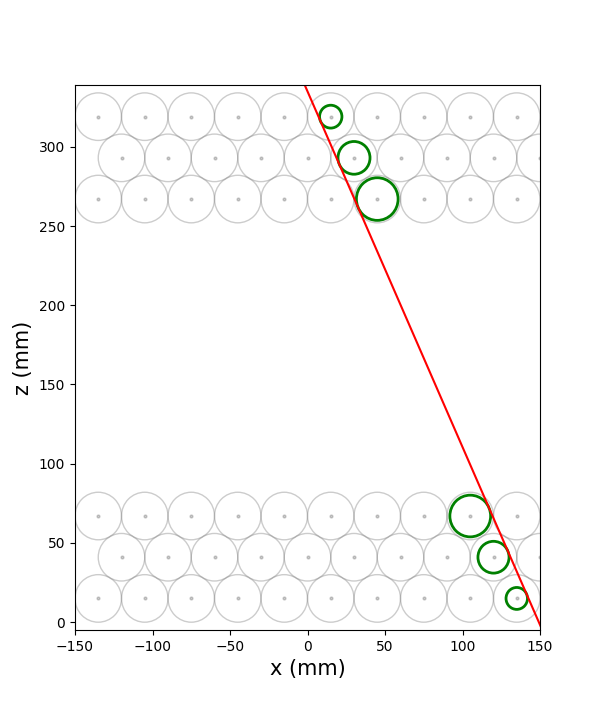

In [9]:
fig2 = plt.figure(figsize=(6,6*1.18))
ax2 = plt.axes()
plotting.plot_det_xz(my_detector, ax2, draw_muon=True, draw_allhits=False)
plt.rc('font', size=16)
#plt.savefig('viewxz_signalhits_mdt.png')
plt.show()

In [10]:
# fig3 = plt.figure(figsize=(6,9*1.18))  # good for 10-tube wide atlas_mdt.yml
# #fig3 = plt.figure(figsize=(28,6))   # good for 56-tube wide atlas_mdt_eml1.yml
# ax3 = plt.axes()
# plotting.plot_det_xz(my_detector, ax3, draw_muon=True, draw_allhits=True)
# #plt.savefig('viewxz_allhits_mdt.png')
# plt.show()

In [ ]:
## predefined muon
# my_detector.reset_planes()
# my_detector.add_muon(
#         mu_x=-14., 
#         mu_y=0., 
#         mu_theta=0.25, 
#         mu_phi=0, 
#         mu_time=0
    )

In [89]:
## full 3d plot, doesn't behave great without simming the hits, skip for now
# fig = plt.figure(figsize=(8,12))
# ax = plt.axes(projection='3d')
# plotting.plot_det_volume(my_detector, ax, draw_muon=1)
# #plt.savefig('view3d_mdt.png')
# plt.show()